# Déscription de données
Cette partie décrit les données de notre data set "Grisoni_et_al_2016_EnvInt88" , on cherche à analyser les données en les représentant sous forme de graphe, histogrammes ou boites à moustaches. On a aussi calculer la matrice de confusion a fin de trouver s'il ya une corrélation entre les paramètres. 


In [19]:
#içi on importe les bibliothèques qu'on aura besoin par la suite pour analyser notre data set
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv("Grisoni_et_al_2016_EnvInt88.csv")

Text(0.5, 1.0, 'Répartition des classes ')

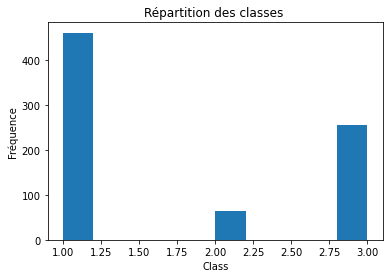

In [3]:
#On affiche le histogramme pour voir la répartition des classes en fonctions des tuples.
plt.hist(data['Class'])
plt.xlabel("Class")
plt.ylabel("Fréquence")
plt.title("Répartition des classes ")


In [15]:
#On calcule le nombre de tuples de classe 1, de classe 2 et de classe 3 pour avoir les memes
#résultats que l'histogramme en dessus.
data_class1 = data[data.Class==1]
data_class1.shape
data_class2 = data[data.Class==2]
data_class2.shape
data_class3 = data[data.Class==3]
print(data_class1.shape, data_class2.shape,data_class3.shape )

(460, 14) (64, 14) (255, 14)


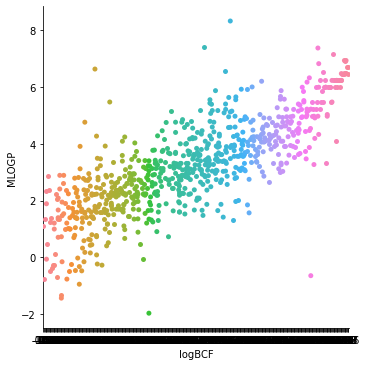

In [12]:
#en utilisant la bibliothèque Seaborn on trace le graphe de MLOGP en fonction de logBCF
#et on remarque qu'il ya une relation linéaire : plus MLOGP augmente, plus LOGBCF augmente
missing_values = ["n/a", "na", "--"]
data = pd.read_csv("Grisoni_et_al_2016_EnvInt88.csv", na_values = missing_values)
sns.catplot(x="logBCF", y="MLOGP", data=data)

<AxesSubplot:xlabel='Class', ylabel='piPC09'>

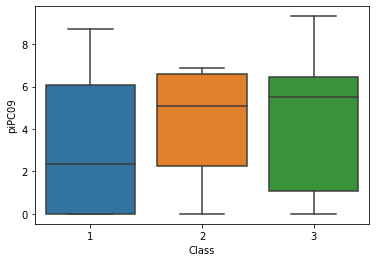

In [13]:
#La bibliothèque Seaborn nous permet aussi de tracer la boite à moustaches pour déterminer le médian des valeurs
#de chaque varibles explicativese pour chaque Classe. içi on a choisit la variable piPC09.
sns.boxplot(x="Class", y="piPC09", data=data)

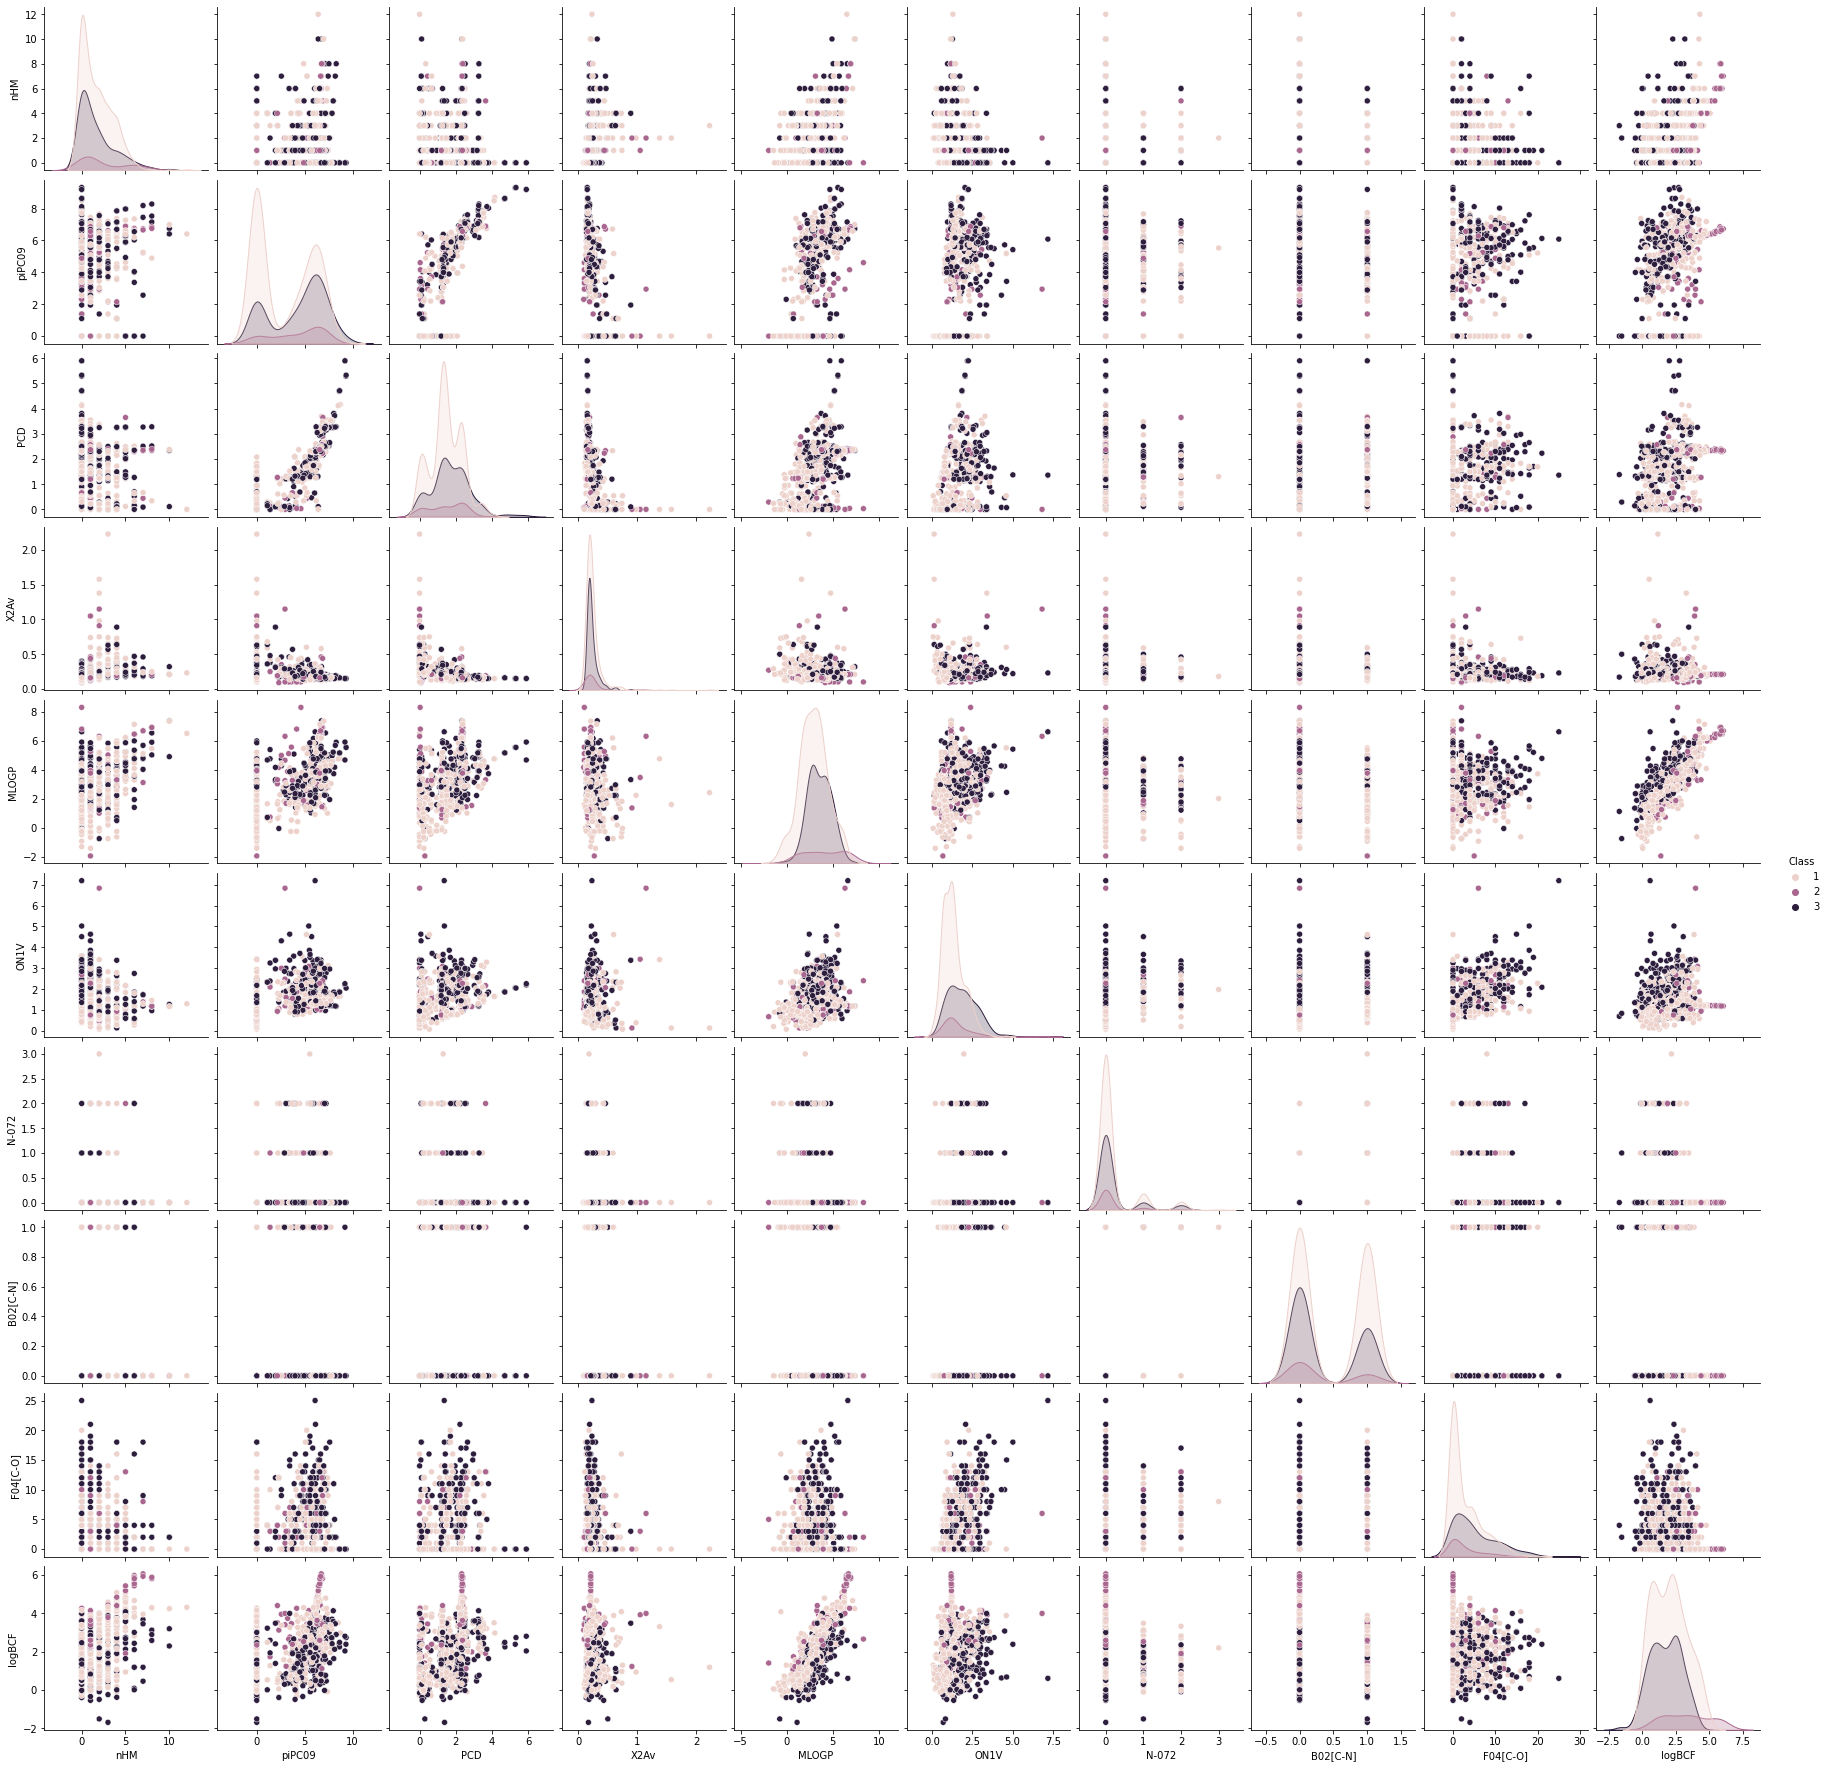

In [14]:
#tracer le nuage des points pour visualiser la répartition des classes en fonctions de chaque variable.
sns.pairplot(data, hue="Class")

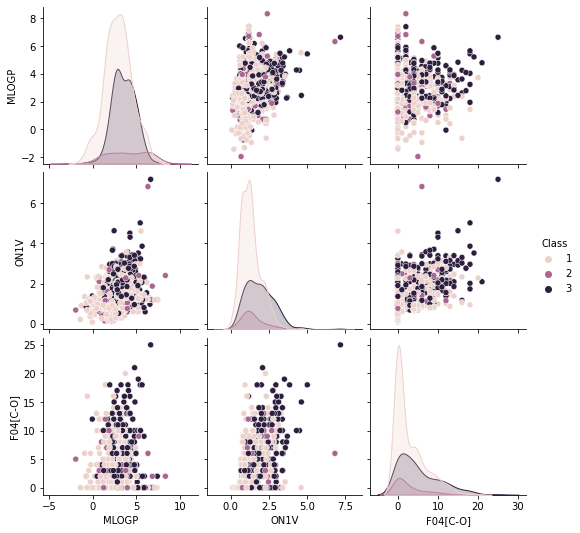

In [16]:
#Le nuage des points mais en dimuniant la dimension.
column =["MLOGP","ON1V","F04[C-O]","Class"]
data_new = data[column]
sns.pairplot(data_new, hue="Class")

In [18]:
# on trace la matrice de confusion et on conclut qu'il ya une forte coréelation entre certaines variables
# zone rouge
data.corr(method="spearman").style.format("{:.2}").background_gradient(cmap=plt.get_cmap("coolwarm"))

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class,logBCF
nHM,1.0,0.078,0.01,0.43,0.31,-0.26,-0.042,-0.22,-0.071,-0.015,0.37
piPC09,0.078,1.0,0.81,-0.36,0.53,0.53,0.087,0.02,0.2,0.22,0.45
PCD,0.01,0.81,1.0,-0.59,0.46,0.21,-0.024,0.12,0.17,0.12,0.39
X2Av,0.43,-0.36,-0.59,1.0,-0.039,-0.031,-0.062,-0.32,-0.21,-0.0064,0.034
MLOGP,0.31,0.53,0.46,-0.039,1.0,0.27,-0.21,-0.35,-0.15,0.21,0.8
ON1V,-0.26,0.53,0.21,-0.031,0.27,1.0,0.28,0.17,0.45,0.3,0.2
N-072,-0.042,0.087,-0.024,-0.062,-0.21,0.28,1.0,0.4,0.26,-0.00053,-0.19
B02[C-N],-0.22,0.02,0.12,-0.32,-0.35,0.17,0.4,1.0,0.27,-0.11,-0.32
F04[C-O],-0.071,0.2,0.17,-0.21,-0.15,0.45,0.26,0.27,1.0,0.22,-0.13
Class,-0.015,0.22,0.12,-0.0064,0.21,0.3,-0.00053,-0.11,0.22,1.0,-0.051
